# OOPython

Задача 3. Численное интегрирование.

Борисов Дмитрий, 373гр.

### 1. Создать иерархию классов для реализации вычислений по следующим методам численного интегрирования:
* метод левых прямоугольников - LeftRectangleIntegral
* метод правых прямоугольников - RightRectangleIntegral
* метод средних прямоугольников - MiddleRectangleIntegral
* метод трапеций - TrapeziumIntegral
* метод Симпсона 4-гопорядка точности - SimpsonIntegral

In [51]:
import numpy as np
class AbstractIntegral:
    _MethodName = 'Abstract Integral'
    _shift = 0.
        
    def ChooseFunction(self, function):
        self._function = function
    
    def SetLeftBorder(self, leftBorder):
        self._leftBorder = leftBorder
        
    def SetGrid(self, step):
        self._step = step
        
    def SetCoeffients(self, points):
        raise NotImplementedError
    
    def getName(self):
        return self._MethodName
    
    def __call__(self, x):
        self._gridArray = np.arange(self._leftBorder, x + self._step, self._step)   
        self._gridLength = len(self._gridArray)
        self.SetCoeffients(self._gridLength)
        
        f, left, right, coeff = self._function, self._leftBorder, x, self._coeffients    
        
        value = 0.
        for i in range(self._gridLength):
            xCurrent = self._gridArray[i]
            value += coeff[i] * f(xCurrent + self._shift * self._step)
            
        value *= self._step
        return value     
        
class LeftRectangleIntegral(AbstractIntegral):
    _MethodName = 'Left Rectangle Integral'
    
    def SetCoeffients(self, points):
        self._coeffients = [1] * (points - 1) + [0]

class RightRectangleIntegral(AbstractIntegral):
    _MethodName = 'Right Rectangle Integral'
    
    def SetCoeffients(self, points):
        self._coeffients = [0] + [1] * (points - 1)

class MiddleRectangleIntegral(AbstractIntegral):
    _MethodName = 'Middle Rectangle Integral'
    _shift = 0.5
    
    def SetCoeffients(self, points):
        self._coeffients = [1] * (points - 1) + [0.]

class TrapeziumIntegral(AbstractIntegral):
    _MethodName = 'Trapezium Integral'
    
    def SetCoeffients(self, points):
        self._coeffients = [0.5] + [1] * (points - 2) + [0.5]
    
class SimpsonIntegral(AbstractIntegral):
    _MethodName = 'Simpson Integral'
    
    def SetCoeffients(self, points):
        self._coeffients = [1./3] + [4./3, 2./3] * ((points - 2) / 2)
        if (points % 2 == 1):
            self._coeffients += [4./3]
        self._coeffients += [1./3]

### 2. Тестирование с помощью реализованных классов вычислить значения определенных интегралов с шагами численного интегрирования 
$$
h_n = \frac{1}{2^n}, n = 0, 1, ..., 14
$$
### на отрезке [0;2] на пяти подынтегральных функциях:

In [52]:
listOfIntegrals = [LeftRectangleIntegral(), RightRectangleIntegral(), MiddleRectangleIntegral(),\
                         TrapeziumIntegral(), SimpsonIntegral()]

import math as m
listOfFunctions = [lambda t: 5./(2 + 3 * t**2), lambda t: 2./ (5 + m.cos(t)), lambda t: (3 + 4 * t**2)**(1./3), 
                   lambda t: 2. * m.exp(-t**2) / m.pi**(0.5), lambda t: m.log(t + 2) / (t + 2)]

NameOfFunctions = ['5/(2 + 3 * x**2)', '2/(5 + cos(x))', '(3 + 4 * x**2)**(1/3)',\
                   '2 * exp(-x**2) / pi**(1/2)', 'log(x + 2) / (x + 2)'] 

listOfSteps = [2**(-n) for n in range(15)]
x0 = 2.

In [53]:
import pandas as pd
from IPython.display import display

for function, name in zip(listOfFunctions, NameOfFunctions):
    for integral in listOfIntegrals:
        integral.ChooseFunction(function)
        integral.SetLeftBorder(0.)
    print('Integral of f(x) = ' + name + ', x = [0;2]')
    
    data = []
    
    for h in listOfSteps:
        dataIn = []
        for integral in listOfIntegrals:
            integral.SetGrid(h)
            dataIn.append(integral(x0))         
        data.append(dataIn)
        
    df = pd.DataFrame(data=data, index=listOfSteps, columns=['Left Rectangle', 'Right Rectangle',\
                                                             'Middle Rectangle', 'Trapezium', 'Simpson'] )
    display(df)
  

Integral of f(x) = 5/(2 + 3 * x**2), x = [0;2]


,Left Rectangle,Right Rectangle,Middle Rectangle,Trapezium,Simpson
1.000000,3.500000,1.357143,2.389610,2.428571,2.285714
0.500000,2.944805,1.873377,2.418119,2.409091,2.402597
0.250000,2.681462,2.145748,2.415991,2.413605,2.415109
0.125000,2.548726,2.280869,2.415395,2.414798,2.415195
0.062500,2.482061,2.348132,2.415246,2.415097,2.415196
0.031250,2.448653,2.381689,2.415209,2.415171,2.415196
0.015625,2.431931,2.398449,2.415199,2.415190,2.415196
0.007812,2.423565,2.406824,2.415197,2.415195,2.415196
0.003906,2.419381,2.411010,2.415196,2.415196,2.415196
0.001953,2.417289,2.413103,2.415196,2.415196,2.415196


Integral of f(x) = 2/(5 + cos(x)), x = [0;2]


,Left Rectangle,Right Rectangle,Middle Rectangle,Trapezium,Simpson
1.000000,0.694324,0.797305,0.734696,0.745815,0.737871
0.500000,0.714510,0.766001,0.737532,0.740255,0.738402
0.250000,0.726021,0.751766,0.738216,0.738894,0.738440
0.125000,0.732119,0.744991,0.738386,0.738555,0.738442
0.062500,0.735252,0.741689,0.738428,0.738471,0.738442
0.031250,0.736840,0.740058,0.738439,0.738449,0.738442
0.015625,0.737640,0.739249,0.738441,0.738444,0.738442
0.007812,0.738041,0.738845,0.738442,0.738443,0.738442
0.003906,0.738241,0.738644,0.738442,0.738442,0.738442
0.001953,0.738342,0.738543,0.738442,0.738442,0.738442


Integral of f(x) = (3 + 4 * x**2)**(1/3), x = [0;2]


,Left Rectangle,Right Rectangle,Middle Rectangle,Trapezium,Simpson
1.000000,3.355181,4.581333,3.876830,3.968257,3.920792
0.500000,3.616005,4.229081,3.899134,3.922543,3.907305
0.250000,3.757569,4.064107,3.904986,3.910838,3.906937
0.125000,3.831278,3.984547,3.906449,3.907912,3.906937
0.062500,3.868864,3.945498,3.906815,3.907181,3.906937
0.031250,3.887839,3.926157,3.906907,3.906998,3.906937
0.015625,3.897373,3.916532,3.906929,3.906952,3.906937
0.007812,3.902151,3.911731,3.906935,3.906941,3.906937
0.003906,3.904543,3.909333,3.906937,3.906938,3.906937
0.001953,3.905740,3.908135,3.906937,3.906937,3.906937


Integral of f(x) = 2 * exp(-x**2) / pi**(1/2), x = [0;2]


,Left Rectangle,Right Rectangle,Middle Rectangle,Trapezium,Simpson
1.000000,1.543487,0.435774,0.997713,0.989631,0.936492
0.500000,1.270600,0.716744,0.996121,0.993672,0.995019
0.250000,1.133360,0.856432,0.995534,0.994896,0.995304
0.125000,1.064447,0.925983,0.995376,0.995215,0.995321
0.062500,1.029911,0.960679,0.995336,0.995295,0.995322
0.031250,1.012624,0.978008,0.995326,0.995316,0.995322
0.015625,1.003975,0.986667,0.995323,0.995321,0.995322
0.007812,0.999649,0.990995,0.995322,0.995322,0.995322
0.003906,0.997486,0.993159,0.995322,0.995322,0.995322
0.001953,0.996404,0.994240,0.995322,0.995322,0.995322


Integral of f(x) = log(x + 2) / (x + 2), x = [0;2]


,Left Rectangle,Right Rectangle,Middle Rectangle,Trapezium,Simpson
1.000000,0.712778,0.712778,0.724449,0.712778,0.719321
0.500000,0.718613,0.718613,0.721700,0.718613,0.720558
0.250000,0.720156,0.720156,0.720940,0.720156,0.720671
0.125000,0.720548,0.720548,0.720745,0.720548,0.720679
0.062500,0.720647,0.720647,0.720696,0.720647,0.720679
0.031250,0.720671,0.720671,0.720684,0.720671,0.720680
0.015625,0.720677,0.720677,0.720681,0.720677,0.720680
0.007812,0.720679,0.720679,0.720680,0.720679,0.720680
0.003906,0.720679,0.720679,0.720680,0.720679,0.720680
0.001953,0.720679,0.720679,0.720680,0.720679,0.720680


### 3. Для каждой заданной функции построить графики погрешности вычислений интеграла по формулам всех методов в первом списке в зависимости от шага численного интегрирования (в логарифмическом масштабе, аналогично Задаче 2).

In [54]:
from sympy import *
x = Symbol('x')

IntegralValue = [2.4152, 0.738442348660735,\
                integrate((3. + 4 * x**2)**(1./3), (x, 0, x0)).evalf(),\
                integrate(2. * exp(-x**2) / pi**(0.5), (x, 0, x0)).evalf(),\
                integrate(log(x + 2) / (x + 2), (x, 0, x0)).evalf()]

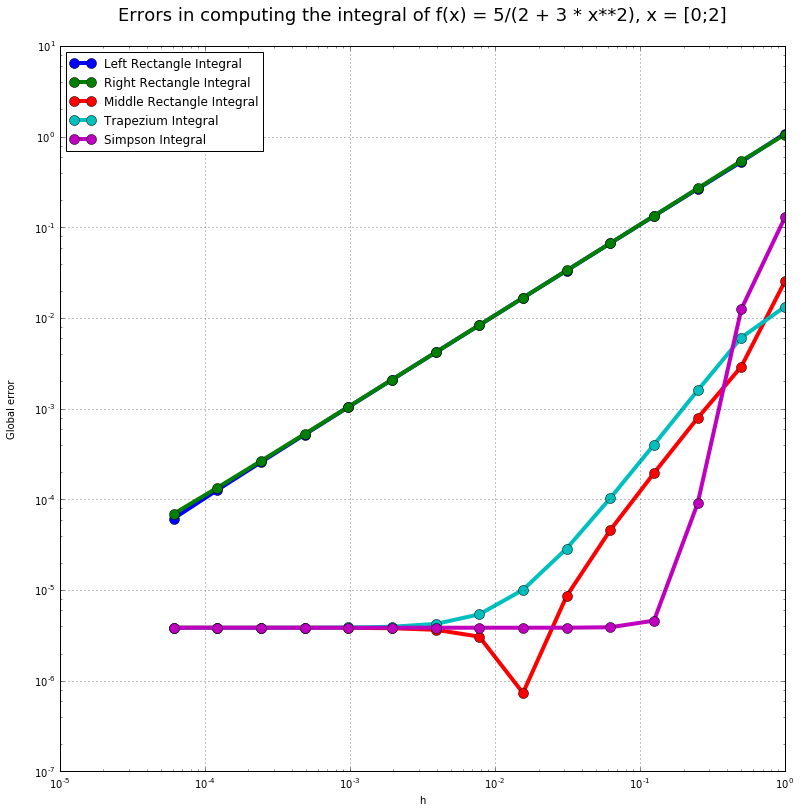

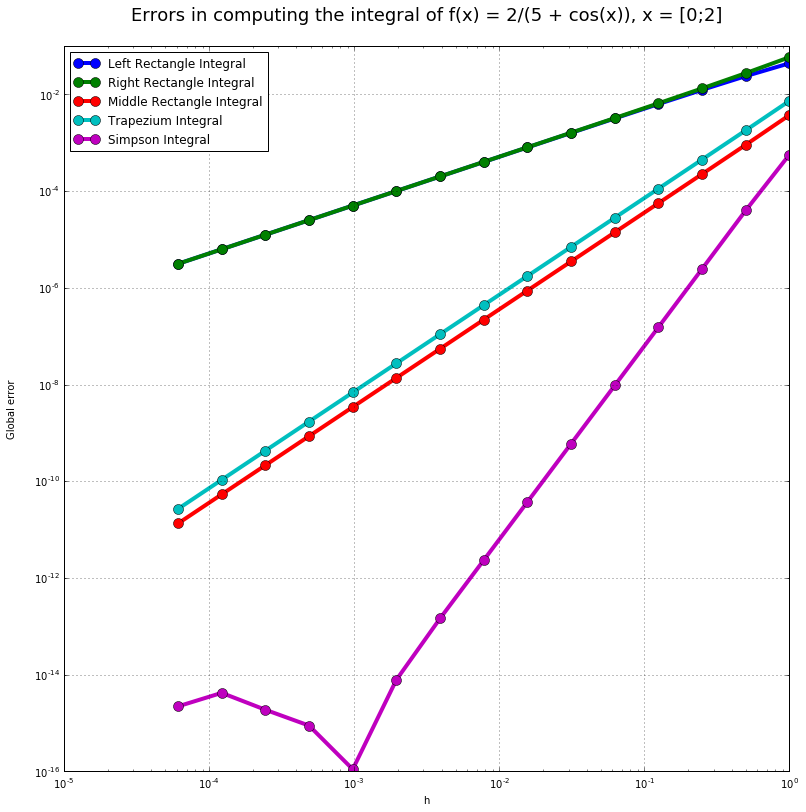

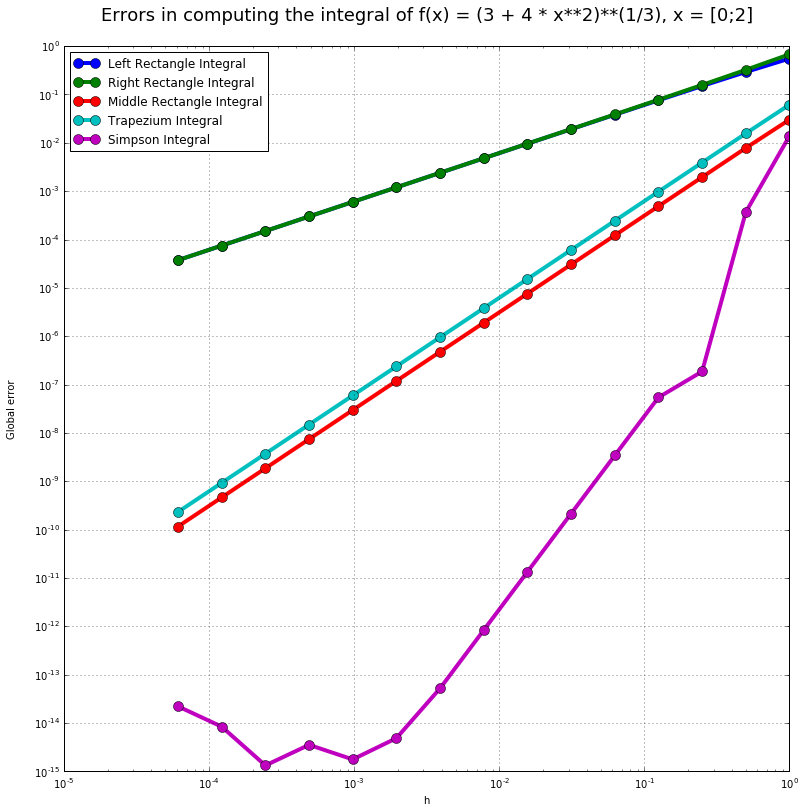

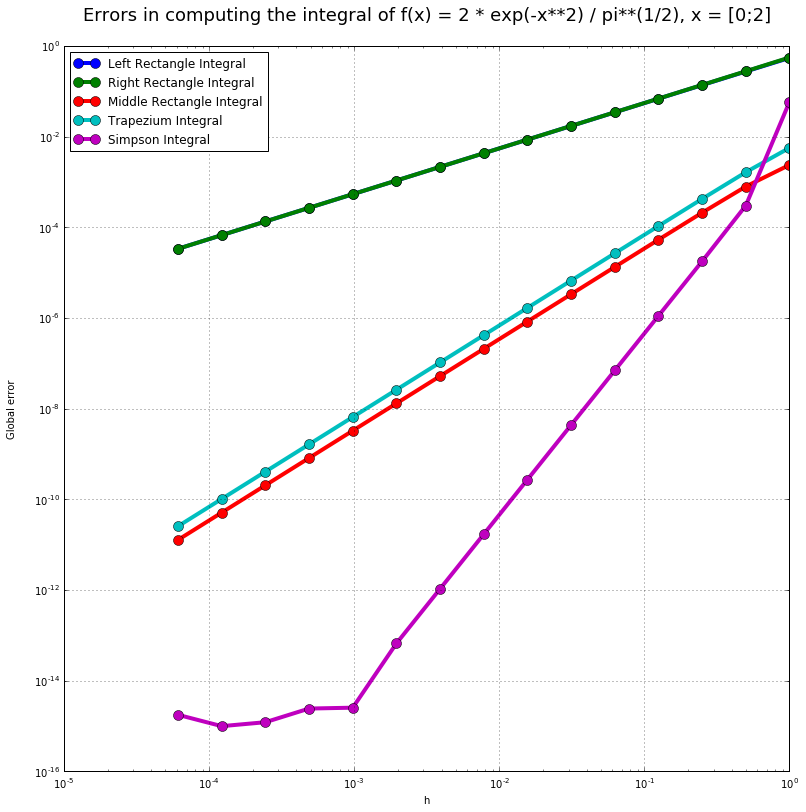

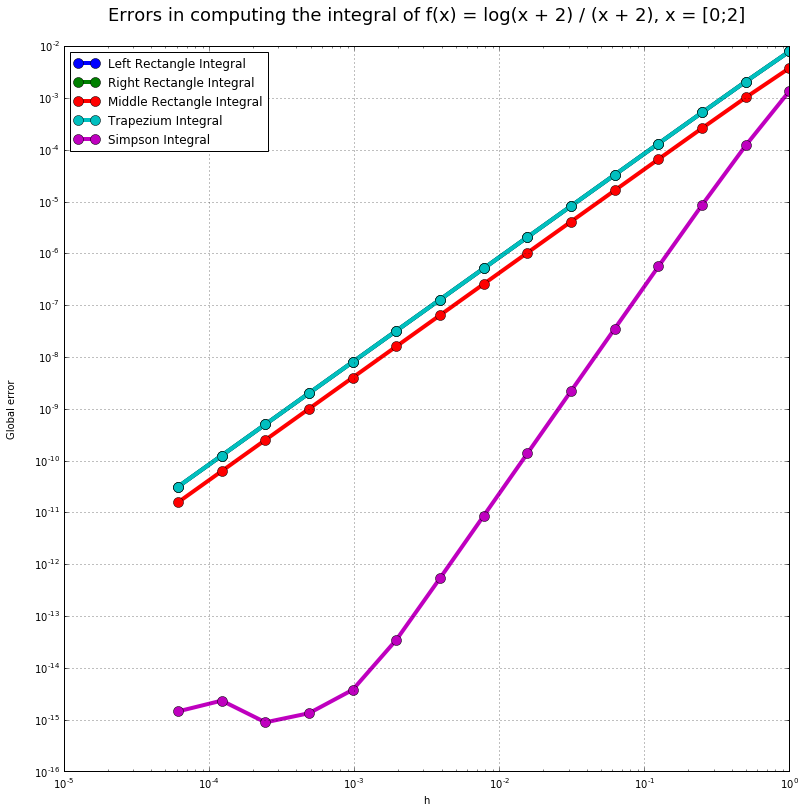

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

for function, name, value in zip(listOfFunctions, NameOfFunctions, IntegralValue):

    plt.figure(figsize=(13, 13))
    plt.title('Errors in computing the integral of f(x) = ' + name + ', x = [0;2]\n', fontsize=18)
    plt.xlabel('h')
    plt.ylabel('Global error\n')
    plt.grid('on')

    
    listOfErrors = []
    
    for integral in listOfIntegrals:
        integral.ChooseFunction(function)
        integral.SetLeftBorder(0.)
    
        errorList = []
        for h in listOfSteps:
            integral.SetGrid(h)
            error = m.fabs(integral(x0) - value)
            errorList.append(error)
        
        listOfErrors.append(errorList)

    for integral, errorList in zip(listOfIntegrals, listOfErrors):
        plt.loglog(listOfSteps, errorList, '-o', markersize = 10, linewidth = 4, label = integral.getName())
        plt.legend(loc='upper left')

    plt.show()        